# Fandango Movie Ratings 

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

A rounding bias was discovered by Walt Hickey, that showed that Fandago movie ratings were displayed as higher than their true review score.  The HTML code that was scraped to uncover this bias is no long displayed in Fandango's HTML.  

Movie ratings data for popular movies (30+ ratings) from 2015 and 2016 will be looked at to determine whether there has been any changes in Fandango's rating systems distribution after Hickey's analysis.  

Data can be found at:
- https://github.com/fivethirtyeight/data/tree/master/fandango
- https://github.com/mircealex/Movie_ratings_2016_17


In [19]:
# Setting up the environment 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
# Importing data into pandas dataframe
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
print(fandango.columns)
# Isolating relevant columns 
fandango_columns = ['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']
fandango_pre_15 = fandango[fandango_columns].copy()

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')


In [4]:
fandango_pre_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
movie_ratings.columns
movie_rating_columns = ['movie','year','fandango']

fandango_post_15 = movie_ratings[movie_rating_columns].copy()

In [6]:
fandango_post_15.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Sampling

The Fandango data contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015  The sampling was not random as there was not an equal chance for every movie to be selected.  The movies that had less than 30 ratings were excluded.  

The movie_ratings data contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017. This again is not random sampling as only popular movies with a lot of reviews that were released in 2016 and 2017 were included. 

## Selecting Relevant Data

Movies with 30+ ratings on Fandango will be looked at to provide consistency between the two datasets.  

In [7]:
# Finding the number of ratings in fandango_pre_15 that are less than 30
print("The number of movies with less than 30 ratings: " + str(len(fandango_pre_15[fandango_pre_15['Fandango_votes'] < 30])))

The number of movies with less than 30 ratings: 0


## Missing Data

There is no information housed in the movie_ratings dataset.  It just stipulates that only "popular" movies were included.  We will take a random sample of the data and check whether those ten data points all have above 30 ratings.  

In [8]:
fandango_post_15.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of August 20, 2018 the fan movie ratings for the sample are listed below:

|Movie| Fan Ratings|
|:-------------:|:-------------:|
|Mechanic: Resurrection | 2,248 |
|Warcraft | 7,277 |
|Max Steel | 493 |
|Me Before You | 5,267 |
|Fantastic Beasts and Where to Find Them | ~13400 |
|Cell | 18 |
|Genius | 127 |
|Sully  | 11,882 |
|A Hologram for the King | 500 |
|Captain America: Civil War | 35,114 |

90% of the movies have over 30 ratings.

In [9]:
# Isolate the data based on year
fandango_2016 = fandango_post_15[fandango_post_15['year']==2016].copy()

In [10]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [11]:
# Isolating titles with 2015
fandango_15_yes = ['2015' in x for x in fandango_pre_15['FILM']]
fandango_2015 = fandango_pre_15[fandango_15_yes].copy()

In [12]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


([<matplotlib.axis.XTick at 0x7f78e53e3748>,
 <a list of 11 Text xticklabel objects>)

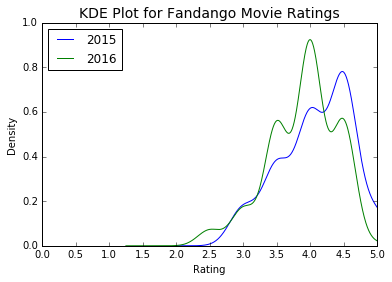

In [13]:
%matplotlib inline

fandango_2015['Fandango_Stars'].plot.kde(label = '2015')
fandango_2016['fandango'].plot.kde(label='2016')
plt.xlabel('Rating')
plt.title('KDE Plot for Fandango Movie Ratings', fontsize=14)
plt.xlim((0,5))
plt.legend(loc=2)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

The two kernal density plots for the 2015 and 2016 have different peaks.  In 2015 majority of reviews were about 4.5 stars.  This was prior to the analysis that found there was excessive rounding in user reviews.  The peak in 2016 is closer to 4.0, which is inline with what was found during the initial analysis.  It was found that the typical rounding was 0.5-1 stars.  After the analysis was published, Fandango stated that it was unintentional and a bug that would be rememedied.  It does appear that some effort to reduce the rounding bias was implemented.  

In [14]:
# Getting the normalized value counts for the two years
freq_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()
freq_2016 = fandango_2016['fandango'].value_counts(normalize=True).sort_index()

print(freq_2015, freq_2016)

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64 2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64


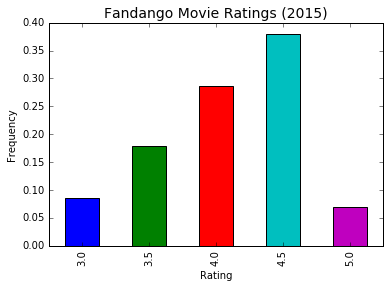

In [74]:
freq_2015.plot.bar()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Fandango Movie Ratings (2015)', fontsize=14)

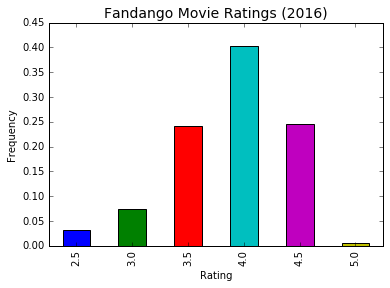

In [16]:
freq_2016.plot.bar()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Fandango Movie Ratings (2016)', fontsize=14)

The bar plots and frequency distribution tables show similar results to the kernal density plots.  

In [58]:
# Creating a function to get a list of the summary statistics for each year
def get_sum_stat(series):
    return [series.mean(), series.median(), series.mode()[0]]

sum_2015 = get_sum_stat(fandango_2015['Fandango_Stars'])
sum_2016 = get_sum_stat(fandango_2016['fandango'])

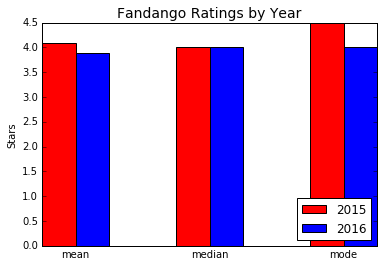

In [73]:
# Creating a bar graph of the Fandago movie ratings by year
labels = ['mean', 'median', 'mode']
ind = np.arange(len(labels))
fig, ax = plt.subplots()
width = 0.25

p1 = ax.bar(ind, sum_2015, width, color='r')
p2 = ax.bar(ind+width, sum_2016, width, color='b')

ax.set_title('Fandango Ratings by Year', fontsize=14)
ax.set_xticks(ind + width )
ax.set_xticklabels(labels)
ax.set_ylabel('Stars')

ax.legend(('2015', '2016'), loc='lower right')
ax.autoscale_view()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
) # labels along the bottom edge are off

plt.show()